In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [195]:
pd.options.display.float_format = "{:.2f}".format

<img src="11.PNG"  style="width:900px;" align="center">

### Get the Data

In [196]:
transactions = pd.read_csv('./transactions.csv')

In [197]:
products = pd.read_csv('./products.csv')

In [198]:
markets = pd.read_csv('./markets.csv')

In [199]:
customers = pd.read_csv('./customers.csv')

In [200]:
date = pd.read_csv('./date.csv')

### Showing All the Tables

In [201]:
transactions.head(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR
1,Prod001,Cus002,Mark002,2018-05-08,3,-1.00,INR
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR


In [202]:
products.sample(2)

,product_code,product_type
3,Prod004,Own Brand
114,Prod115,Distribution


In [155]:
customers.sample(2)

,customer_code,custmer_name,customer_type
20,Cus021,Modular,E-Commerce
19,Cus020,Nixon,E-Commerce


In [156]:
markets.sample(2)

,markets_code,markets_name,zone
6,Mark007,Bhopal,Central
12,Mark013,Bhopal,Central


In [157]:
date.sample(2)

,date,cy_date,year,month_name,date_yy_mmm
708,2019-05-10,2019-05-01,2019,May,19-May
157,2017-11-05,2017-11-01,2017,November,17-Nov


# Transactions

In [203]:
transactions.dtypes

product_code      object
customer_code     object
market_code       object
order_date        object
sales_qty          int64
sales_amount     float64
currency          object
dtype: object

### Check null values

In [204]:
transactions.isnull().sum()

product_code     0
customer_code    0
market_code      0
order_date       0
sales_qty        0
sales_amount     0
currency         0
dtype: int64

### sales_amout below 1

In [205]:
transactions[transactions['sales_amount'] <= 0].sample(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
18380,Prod065,Cus003,Mark006,2018-10-16,1,0.00,INR
111769,Prod292,Cus022,Mark011,2019-07-19,1,0.00,INR
28500,Prod106,Cus007,Mark006,2018-05-23,7,0.00,INR


In [206]:
len(transactions[transactions['sales_amount'] <= 0])

1611

In [207]:
transactions.shape

(150283, 7)

In [208]:
transactions.drop(transactions[transactions['sales_amount'] <= 0].index, inplace=True)

In [209]:
transactions.shape

(148672, 7)

### USD to INR conversation

In [210]:
transactions['currency'].unique()

array(['INR', 'USD'], dtype=object)

In [211]:
transactions[transactions['currency'] == 'USD']

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
5,Prod003,Cus005,Mark004,2017-11-20,59,500.00,USD
6,Prod003,Cus005,Mark004,2017-11-22,36,250.00,USD
286,Prod003,Cus005,Mark004,2017-11-20,59,500.00,USD
287,Prod003,Cus005,Mark004,2017-11-22,36,250.00,USD


In [212]:
transactions[transactions['currency'] == 'USD']['sales_amount']

5     500.00
6     250.00
286   500.00
287   250.00
Name: sales_amount, dtype: float64

In [213]:
val = transactions[transactions['currency'] == 'USD'].index

In [214]:
val

Int64Index([5, 6, 286, 287], dtype='int64')

In [215]:
for x in val:
    transactions.at[x,'sales_amount'] = transactions.at[x,'sales_amount']*75
    transactions.at[x,'currency'] = 'INR'

In [216]:
transactions.loc[val]

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
5,Prod003,Cus005,Mark004,2017-11-20,59,37500.00,INR
6,Prod003,Cus005,Mark004,2017-11-22,36,18750.00,INR
286,Prod003,Cus005,Mark004,2017-11-20,59,37500.00,INR
287,Prod003,Cus005,Mark004,2017-11-22,36,18750.00,INR


### Adding column product_price

In [217]:
transactions['product_price'] = transactions['sales_amount'] / transactions['sales_qty']

In [218]:
transactions.head(4)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00


In [219]:
transactions.isnull().sum()

product_code     0
customer_code    0
market_code      0
order_date       0
sales_qty        0
sales_amount     0
currency         0
product_price    0
dtype: int64

### Adding column original_price
#### original_price refers to product price without profit

In [220]:
def calc_perc(y):
    profit = 8
    
    if y > 4000:
        profit = 23
    elif y > 3000:
        profit = 19
    elif y > 2000:
        profit = 17
    elif y > 1000:
        profit = 15
    elif y > 500:
        profit = 13
    elif y > 100:
        profit = 11
    else:
        profit = 8
        
    return profit    

In [221]:
transactions['profit_percentage'] = transactions['product_price'].apply(calc_perc)

In [222]:
transactions.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15
5,Prod003,Cus005,Mark004,2017-11-20,59,37500.00,INR,635.59,13


In [230]:
transactions.shape

(148672, 10)

In [225]:
transactions['profit_percentage'].isnull().sum()

0

In [226]:
transactions.isnull().sum()

product_code         0
customer_code        0
market_code          0
order_date           0
sales_qty            0
sales_amount         0
currency             0
product_price        0
profit_percentage    0
dtype: int64

In [228]:
transactions['original_price'] = (transactions['product_price'] - (transactions['product_price']*(transactions['profit_percentage'] / 100)))

In [229]:
transactions.head(4)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15,1016.60


### Adding column profit

In [231]:
transactions['profit'] = transactions['product_price']*(transactions['profit_percentage'] / 100)

In [232]:
transactions.head(4)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,45.37
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25,113.75
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21,75.79
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15,1016.60,179.40


### Adding Column total_profit

In [233]:
transactions['total_profit'] = (transactions['sales_qty'])*(transactions['product_price']*(transactions['profit_percentage'] / 100))

In [234]:
transactions.head(4)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit,total_profit
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,45.37,4536.51
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25,113.75,113.75
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21,75.79,75.79
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15,1016.60,179.40,1076.40


### Adding column total_cost

In [235]:
transactions['total_cost'] = (transactions['sales_amount'])-(transactions['total_profit'])

In [236]:
transactions.head(4)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit,total_profit,total_cost
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,45.37,4536.51,36704.49
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25,113.75,113.75,761.25
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21,75.79,75.79,507.21
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15,1016.60,179.40,1076.40,6099.60


### verifying values

In [237]:
transactions['sales_amount'].sum()

986676768.0

In [238]:
transactions['total_cost'].sum()

849375728.9

In [239]:
transactions['total_profit'].sum()

137301039.1

In [240]:
(transactions['total_cost'].sum() + transactions['total_profit'].sum()) - transactions['sales_amount'].sum()

0.0

In [241]:
transactions.shape

(148672, 13)

# Products

In [242]:
products.head(3)

,product_code,product_type
0,Prod001,Own Brand
1,Prod002,Own Brand
2,Prod003,Own Brand


In [243]:
products['product_type'].unique()

array(['Own Brand', 'Distribution'], dtype=object)

In [244]:
products['product_code'].nunique()

279

In [245]:
len(products[products['product_type'] == 'Own Brand'])

191

In [246]:
len(products[products['product_type'] == 'Distribution'])

88

In [247]:
transactions['product_code'].nunique()

338

In [248]:
prod_code1 = pd.Series(products['product_code'].unique())

In [249]:
prod_code2 = pd.Series(transactions['product_code'].unique())

In [250]:
prod_code1.tail()

274    Prod275
275    Prod276
276    Prod277
277    Prod278
278    Prod279
dtype: object

In [251]:
prod_code2.tail()

333    Prod335
334    Prod336
335    Prod337
336    Prod338
337    Prod339
dtype: object

In [252]:
for x in range(279, 338, 1):
    products = products.append({'product_code' : prod_code2[x] , 'product_type' : 'Own Brand'}, ignore_index=True)

In [253]:
products['product_code'].nunique()

338

In [254]:
products.tail()

,product_code,product_type
333,Prod335,Own Brand
334,Prod336,Own Brand
335,Prod337,Own Brand
336,Prod338,Own Brand
337,Prod339,Own Brand


In [255]:
transactions.shape

(148672, 13)

In [256]:
transactions2 = pd.merge(transactions, products, how='inner', on='product_code')

In [257]:
transactions2.sample(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit,total_profit,total_cost,product_type
18453,Prod065,Cus019,Mark011,2019-01-23,1,551.00,INR,551.00,13,479.37,71.63,71.63,479.37,Own Brand
145763,Prod334,Cus014,Mark003,2020-04-27,34,36079.00,INR,1061.15,15,901.98,159.17,5411.85,30667.15,Own Brand
48770,Prod133,Cus006,Mark004,2019-04-17,1,208.00,INR,208.00,11,185.12,22.88,22.88,185.12,Own Brand


In [258]:
transactions2.shape

(148672, 14)

# Customers

In [259]:
customers.head(3)

,customer_code,custmer_name,customer_type
0,Cus001,Surge Stores,Brick & Mortar
1,Cus002,Nomad Stores,Brick & Mortar
2,Cus003,Excel Stores,Brick & Mortar


In [260]:
customers['customer_type'].unique()

array(['Brick & Mortar', 'E-Commerce'], dtype=object)

In [261]:
customers['customer_type'].nunique()

2

In [262]:
customers['customer_code'].nunique()

38

In [263]:
transactions2['customer_code'].nunique()

38

In [264]:
transactions2.shape

(148672, 14)

In [265]:
transactions3 = pd.merge(transactions2, customers, how='inner', on='customer_code')

In [266]:
transactions3.sample(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit,total_profit,total_cost,product_type,custmer_name,customer_type
65305,Prod318,Cus012,Mark003,2019-09-13,13,16037.00,INR,1233.62,15,1048.57,185.04,2405.55,13631.45,Own Brand,Integration Stores,Brick & Mortar
145364,Prod053,Cus018,Mark011,2019-05-22,1,176.00,INR,176.00,11,156.64,19.36,19.36,156.64,Own Brand,Electricalslance Stores,Brick & Mortar
97605,Prod278,Cus020,Mark004,2020-02-24,1,204.00,INR,204.00,11,181.56,22.44,22.44,181.56,Distribution,Nixon,E-Commerce


In [267]:
transactions3.shape

(148672, 16)

# Markets

In [268]:
markets.columns

Index(['markets_code', 'markets_name', 'zone'], dtype='object')

In [269]:
markets = markets.rename(columns={"markets_code": "market_code", "markets_name": "market_name"})

In [270]:
markets.head(3)

,market_code,market_name,zone
0,Mark001,Chennai,South
1,Mark002,Mumbai,Central
2,Mark003,Ahmedabad,North


In [271]:
markets['market_name'].unique()

array(['Chennai', 'Mumbai', 'Ahmedabad', 'Delhi NCR', 'Kanpur',
       'Bengaluru', 'Bhopal', 'Lucknow', 'Patna', 'Kochi', 'Nagpur',
       'Surat', 'Hyderabad', 'Bhubaneshwar'], dtype=object)

In [272]:
markets['market_name'].nunique()

14

In [273]:
markets['zone'].unique()

array(['South', 'Central', 'North'], dtype=object)

In [274]:
markets['zone'].nunique()

3

In [275]:
markets['market_code'].nunique()

15

In [276]:
transactions3['market_code'].nunique()

15

In [277]:
transactions3.shape

(148672, 16)

In [278]:
transactions4 = pd.merge(transactions3, markets, how='inner', on='market_code')

In [279]:
transactions4.head(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit,total_profit,total_cost,product_type,custmer_name,customer_type,market_name,zone
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,45.37,4536.51,36704.49,Own Brand,Surge Stores,Brick & Mortar,Chennai,South
1,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,45.37,4536.51,36704.49,Own Brand,Surge Stores,Brick & Mortar,Chennai,South
2,Prod013,Cus001,Mark001,2017-10-10,240,143560.00,INR,598.17,13,520.40,77.76,18662.80,124897.20,Own Brand,Surge Stores,Brick & Mortar,Chennai,South


In [280]:
transactions4.shape

(148672, 18)

# Date

In [281]:
date.columns

Index(['date', 'cy_date', 'year', 'month_name', 'date_yy_mmm'], dtype='object')

In [282]:
date = date.rename(columns={"date": "order_date"})

In [283]:
date.head(3)

,order_date,cy_date,year,month_name,date_yy_mmm
0,2017-06-01,2017-06-01,2017,June,17-Jun
1,2017-06-02,2017-06-01,2017,June,17-Jun
2,2017-06-03,2017-06-01,2017,June,17-Jun


In [284]:
date['order_date'].nunique()

1126

In [285]:
transactions4['order_date'].nunique()

804

In [286]:
transactions4.shape

(148672, 18)

In [287]:
transactions5 = pd.merge(transactions4, date, how='inner', on='order_date')

In [288]:
transactions5.head(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,...,total_cost,product_type,custmer_name,customer_type,market_name,zone,cy_date,year,month_name,date_yy_mmm
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,...,36704.49,Own Brand,Surge Stores,Brick & Mortar,Chennai,South,2017-10-01,2017,October,17-Oct
1,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,...,36704.49,Own Brand,Surge Stores,Brick & Mortar,Chennai,South,2017-10-01,2017,October,17-Oct
2,Prod013,Cus001,Mark001,2017-10-10,240,143560.00,INR,598.17,13,520.40,...,124897.20,Own Brand,Surge Stores,Brick & Mortar,Chennai,South,2017-10-01,2017,October,17-Oct


In [289]:
transactions5.shape

(148672, 22)

# Save the file for Power BI

In [290]:
transactions5.to_csv('transactions_all.csv', index=False)

In [291]:
transactions5.columns

Index(['product_code', 'customer_code', 'market_code', 'order_date',
       'sales_qty', 'sales_amount', 'currency', 'product_price',
       'profit_percentage', 'original_price', 'profit', 'total_profit',
       'total_cost', 'product_type', 'custmer_name', 'customer_type',
       'market_name', 'zone', 'cy_date', 'year', 'month_name', 'date_yy_mmm'],
      dtype='object')

In [300]:
len(transactions5.columns)

22

In [292]:
transactions5.dtypes

product_code          object
customer_code         object
market_code           object
order_date            object
sales_qty              int64
sales_amount         float64
currency              object
product_price        float64
profit_percentage      int64
original_price       float64
profit               float64
total_profit         float64
total_cost           float64
product_type          object
custmer_name          object
customer_type         object
market_name           object
zone                  object
cy_date               object
year                   int64
month_name            object
date_yy_mmm           object
dtype: object

# Load the Data

In [293]:
df = pd.read_csv('./transactions_all.csv')

In [294]:
df.head(2)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,...,total_cost,product_type,custmer_name,customer_type,market_name,zone,cy_date,year,month_name,date_yy_mmm
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,...,36704.49,Own Brand,Surge Stores,Brick & Mortar,Chennai,South,2017-10-01,2017,October,17-Oct
1,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,...,36704.49,Own Brand,Surge Stores,Brick & Mortar,Chennai,South,2017-10-01,2017,October,17-Oct


In [295]:
df.shape

(148672, 22)

In [296]:
df['sales_amount'].sum()

986676768.0

In [297]:
df['total_cost'].sum()

849375728.9

In [298]:
df['total_profit'].sum()

137301039.10000002

In [299]:
df['sales_amount'].sum() - (df['total_cost'].sum() + df['total_profit'].sum())

0.0

# Data Visualization

In [301]:
df.corr()

,sales_qty,sales_amount,product_price,profit_percentage,original_price,profit,total_profit,total_cost,year
sales_qty,1.00,0.34,-0.01,-0.05,-0.02,-0.01,0.24,0.36,0.00
sales_amount,0.34,1.00,0.30,0.25,0.30,0.31,0.98,1.00,-0.00
product_price,-0.01,0.30,1.00,0.88,1.00,0.99,0.32,0.30,0.01
profit_percentage,-0.05,0.25,0.88,1.00,0.88,0.84,0.27,0.25,0.01
original_price,-0.02,0.30,1.00,0.88,1.00,0.98,0.32,0.29,0.01
profit,-0.01,0.31,0.99,0.84,0.98,1.00,0.34,0.30,0.00
total_profit,0.24,0.98,0.32,0.27,0.32,0.34,1.00,0.97,-0.00
total_cost,0.36,1.00,0.30,0.25,0.29,0.30,0.97,1.00,-0.00
year,0.00,-0.00,0.01,0.01,0.01,0.00,-0.00,-0.00,1.00


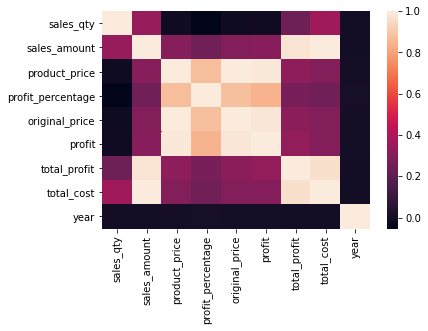

In [302]:
sns.heatmap(df.corr())